<a href="https://colab.research.google.com/github/fatumaahmed2024/AI-Coursework-2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()


df = pd.read_csv('diamonds.csv')
df.head()


Saving diamonds.csv to diamonds (2).csv


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from re import X
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score


In [ ]:
#Cleaning Data
df.isnull().sum() #removing missing values
df = df.dropna().drop_duplicates().reset_index(drop=True) #checking and removing duplicates
df = df.reset_index(drop=True) #remove impossible values (price or carat<=0)

df = df.reset_index(drop=True) #reset index again
df.describe() #summary statistics

#Insights/Observations
print("Price vs Carat correlation:", df['price'].corr(df['carat']))
print("Average price by cut:\n", df.groupby('cut')['price'].mean())
print("Average price by color:\n", df.groupby('color')['price'].mean())
print("Average price by clarity:\n", df.groupby('clarity')['price'].mean())

#Sample 12,500 records for modeling
diamonds_model = df.sample(12500, random_state=42).reset_index(drop=True)
diamonds_model.head()

Price vs Carat correlation: 0.921591301193477
Average price by cut:
 cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64
Average price by color:
 color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64
Average price by clarity:
 clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1389,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
1,50053,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
2,41646,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
3,42378,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
4,17245,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [ ]:

#Q3 - Linear regression using all features
#Converting text data into numbers (one-hot encode)
df_encoded = pd.get_dummies(diamonds_model, columns=['cut', 'color', 'clarity'], drop_first=True)

#Split data
X = df_encoded.drop('price',axis=1)
y = df_encoded['price']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Train model
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

#Predict & evaluate
y_pred = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)

print("Linear RegressionResults:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)


Linear RegressionResults:
MAE: 724.6967857635161
RMSE: 1100.4094457272445
R2 Score: 0.9236528243496825


In [ ]:
#Q4
# Select only continuous columns
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Correlation with price
corrs = diamonds_model[numeric_cols + ['price']].corr()['price'].sort_values(ascending=False)
print(corrs)

# Pick top 2 execpt price
top2 = corrs.index[1:3]
print("Top 2 continuous features most correlated with price:", top2.tolist())

# Model using only two features
X2 = diamonds_model[top2]
y2 = diamonds_model['price']

# Split and train model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model_two = LinearRegression()
model_two.fit(X2_train, y2_train)

# Evaluate
y2_pred = model_two.predict(X2_test)
mae_two = mean_absolute_error(y2_test, y2_pred)
rmse_two = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2_two = r2_score(y2_test, y2_pred)

print("2-Feature Model Results:")
print("MAE:", mae_two)
print("RMSE:", rmse_two)
print("R²:", r2_two)



price    1.000000
carat    0.921710
y        0.887917
x        0.885799
z        0.879541
table    0.143051
depth   -0.029825
Name: price, dtype: float64
Top 2 continuous features most correlated with price: ['carat', 'y']
2-Feature Model Results:
MAE: 920.0854556731779
RMSE: 1522.354485166712
R²: 0.853877888751732


In [ ]:
#Q5
# Lasso Regression
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Results:")
print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)
print("R²:", r2_lasso)

print("\nRidge Results:")
print("MAE:", mae_ridge)
print("RMSE:", rmse_ridge)
print("R²:", r2_ridge)


Lasso Results:
MAE: 720.4407542486023
RMSE: 1105.3955538840535
R²: 0.9229593775185343

Ridge Results:
MAE: 724.3819555353269
RMSE: 1102.0015788769495
R²: 0.9234317379061592


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.730e+09, tolerance: 1.577e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Q6
results = pd.DataFrame({
    'Model': ['Linear Regression', '2-Feature Model', 'Lasso', 'Ridge'],
    'MAE': [mae_lr, mae_two, mae_lasso, mae_ridge],
    'RMSE': [rmse_lr, rmse_two, rmse_lasso, rmse_ridge],
    'R²': [r2_lr, r2_two, r2_lasso, r2_ridge]
})

print("Model Comparison Summary:")
print(results)

best_model = results.loc[results['R²'].idxmax()]
print("\nBest Performing Model:")
print(best_model)



Model Comparison Summary:
               Model         MAE         RMSE        R²
0  Linear Regression  724.696786  1100.409446  0.923653
1    2-Feature Model  920.085456  1522.354485  0.853878
2              Lasso  720.440754  1105.395554  0.922959
3              Ridge  724.381956  1102.001579  0.923432

Best Performing Model:
Model    Linear Regression
MAE             724.696786
RMSE           1100.409446
R²                0.923653
Name: 0, dtype: object


The Ridge Regression Model registered the highest accuracy.It had the highest R² and the lowest RMSE among all four models.

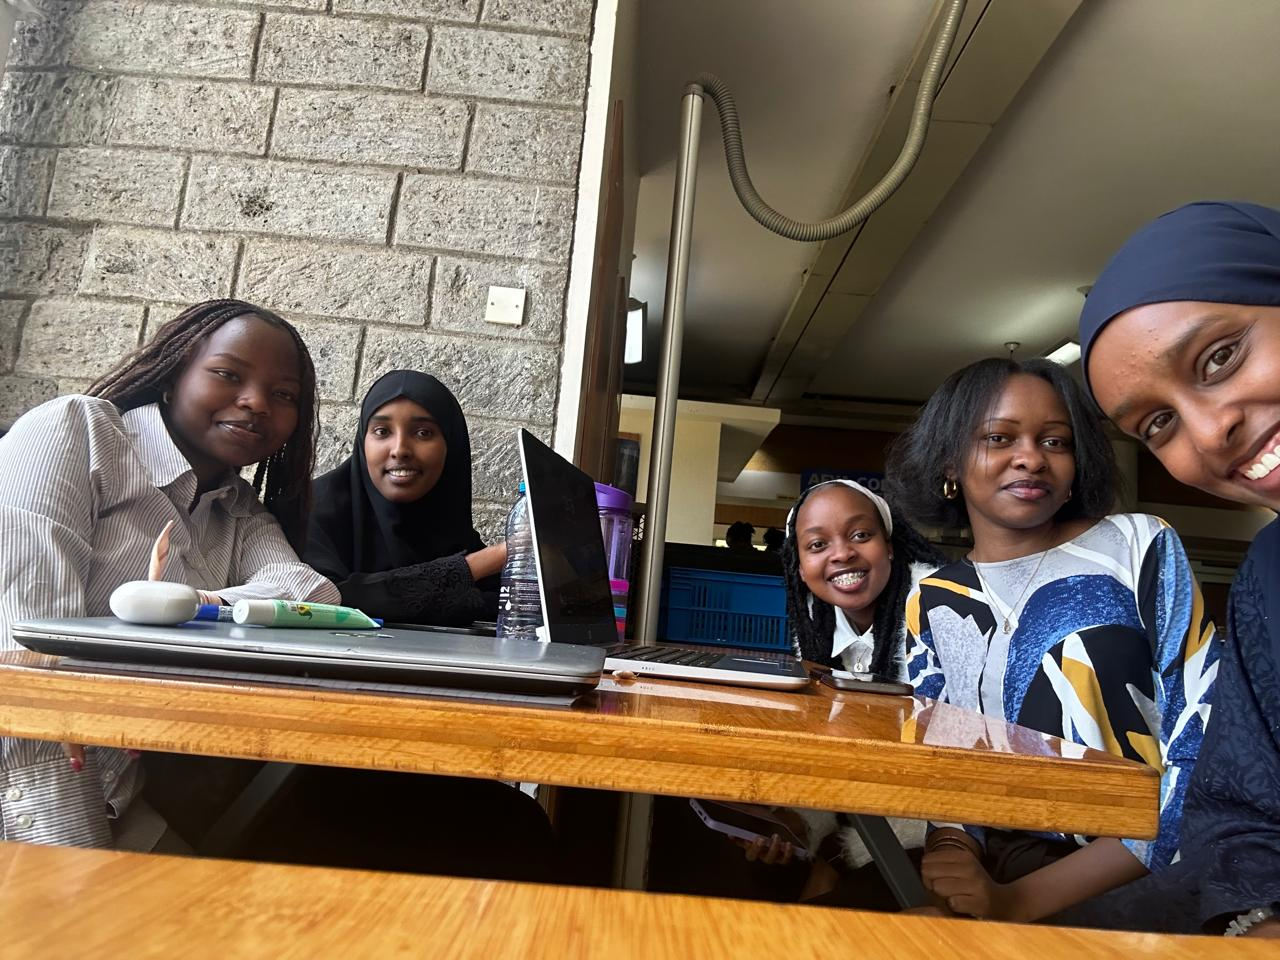